<a href="https://colab.research.google.com/github/MeghaBharti/AI-ML-Experiments-Demos/blob/main/GenAI/PyTorch/Ann_fashion_mnist_pytorch_in_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

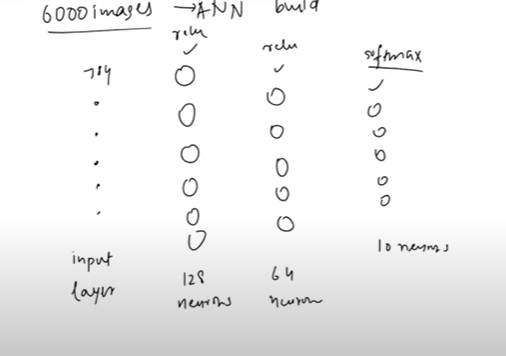

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv("fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


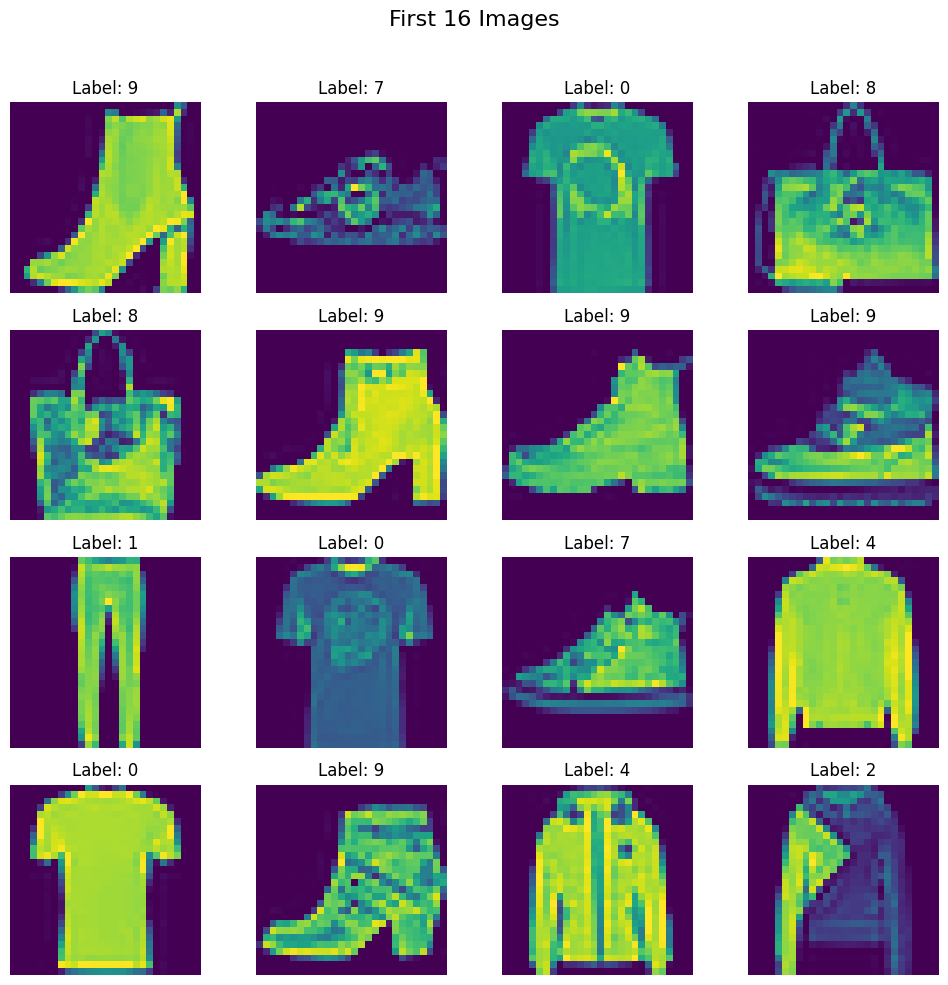

In [4]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [5]:
#train test split
X = df.iloc[:,1:].values
y= df.iloc[:,0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
X_train
y_train

array([7, 6, 7, ..., 0, 8, 6])

In [8]:
#scaling the features
X_train = X_train/225.0
X_test = X_test/225.0

In [9]:
#create CustomDateset Class
class CustomDateset(Dataset):

  def __init__(self, features,labels) -> None:
     self.features = torch.tensor(features , dtype=torch.float32)
     self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)
  def __getitem__(self, index):
     return self.features[index], self.labels[index]

In [10]:
#create train_dataset object
train_dataset = CustomDateset(X_train,y_train)

In [11]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [12]:
# create test_dataset object
test_dataset = CustomDateset(X_test,y_test)
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [35]:
# create train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader =DataLoader(test_dataset, batch_size=32,shuffle=False)


In [28]:
#define nn class

class MyNN(nn.Module):

  def __init__(self,num_features) -> None:
     super().__init__()
     self.model= nn.Sequential(
         nn.Linear(num_features,128),
         nn.ReLU(),
         nn.Linear(128,64),
         nn.ReLU(),
         nn.Linear(64,10)
         )

  def forward(self,x):
    return self.model(x)



In [20]:
#set learning rate and epochs
epochs= 100
learning_rate= 0.1

In [29]:
#initailise the model
model = MyNN(X_train.shape[1])

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [33]:
#training loop

for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features , batch_labels in train_loader:

    #forward pass
    outputs= model(batch_features)

    #cal loss
    loss= criterion(outputs, batch_labels)

    #back prop
    optimizer.zero_grad()
    loss.backward()

    #update gradient
    optimizer.step()

    total_epoch_loss += loss.item()
  print(f'Epoch : {epoch + 1}  ,   Loss: {total_epoch_loss/len(train_loader)}')



Epoch : 1  ,   Loss: 0.00018599077040562406
Epoch : 2  ,   Loss: 0.0001842808892009392
Epoch : 3  ,   Loss: 0.00018332993703855513
Epoch : 4  ,   Loss: 0.00018198541440748764
Epoch : 5  ,   Loss: 0.00018121953353935776
Epoch : 6  ,   Loss: 0.00018022861438415325
Epoch : 7  ,   Loss: 0.00017855750058515696
Epoch : 8  ,   Loss: 0.00017793238506177053
Epoch : 9  ,   Loss: 0.000176906173946918
Epoch : 10  ,   Loss: 0.0001760613074778424
Epoch : 11  ,   Loss: 0.00017387020260988114
Epoch : 12  ,   Loss: 0.0001737899893851136
Epoch : 13  ,   Loss: 0.00017246439805603585
Epoch : 14  ,   Loss: 0.0001714626789665393
Epoch : 15  ,   Loss: 0.00017047510717626817
Epoch : 16  ,   Loss: 0.00016939439519774168
Epoch : 17  ,   Loss: 0.00016891561087201506
Epoch : 18  ,   Loss: 0.00016771915191687487
Epoch : 19  ,   Loss: 0.00016670792783164264
Epoch : 20  ,   Loss: 0.00016602194475126453
Epoch : 21  ,   Loss: 0.0001651676146987787
Epoch : 22  ,   Loss: 0.00016392506740279107
Epoch : 23  ,   Loss: 0.00

In [34]:
#set code to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [38]:
#eveluation code
total=0
correct=0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs,1)

    total += batch_labels.shape[0]

    correct += (predicted == batch_labels).sum().item()

print("Accuracy=",correct/total)


Accuracy= 0.8441666666666666
